In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nrclex import NRCLex
import nltk
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline
import matplotlib

In [2]:
songs = pd.read_csv('../data/songs_after_round_3_cleaning.csv')

In [3]:
songs.head()

song_name       artist  \
0       ​​rockstar  Post Malone   
1    White Iverson  Post Malone   
2  Congratulations  Post Malone   
3           Psycho  Post Malone   
4     I Fall Apart  Post Malone   

                                              lyrics  \
0  [Intro: Post Malone] Hahahahaha Tank God Ayy, ...   
1  [Intro] Double OT I'm a new three [Chorus] Sau...   
2  [Intro: Post Malone] Mm-mmm Yeah, yeah Mm-mmm ...   
3  [Chorus: Post Malone] Damn, my AP goin' psycho...   
4  [Intro] Ooh, I fall apart Ooh, yeah, mmm, yeah...   

                                     descriptionsong  accepted_annotations  \
0  On “rockstar,” Post Malone compares his habits...                  18.0   
1  Virtually unknown before this track, Post Malo...                  31.0   
2  On “Congratulations,“ Post Malone and Quavo ce...                  13.0   
3  “Psycho” is the third single from Post Malone’...                  21.0   
4  On “I Fall Apart,” Post reminisces about a hea...                   7.0   

   contributors  pageviews                                  descriptionartist  \
0         440.0  6884752.0  Austin Richard Post (born July 4, 1995), bette...   
1         222.0  4145011.0  Austin Richard Post (born July 4, 1995), bette...   
2         222.0  3634846.0  Austin Richard Post (born July 4, 1995), bette...   
3         230.0  3082328.0  Austin Richard Post (born July 4, 1995), bette...   
4         126.0  2640796.0  Austin Richard Post (born July 4, 1995), bette...   

                                          images_url  followers_count gender  \
0  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
1  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
2  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
3  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
4  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   

   birth_year birth_decade birth_5_yr  \
0      1995.0        1990s  1995-1999   
1      1995.0        1990s  1995-1999   
2      1995.0        1990s  1995-1999   
3      1995.0        1990s  1995-1999   
4      1995.0        1990s  1995-1999   

                                      cleaned_lyrics  profain  profain_prob  
0  [intro: post malone] hahahahaha tank god ayy a...        1      1.000000  
1  [intro] double ot im a new three [chorus] sauc...        1      1.000000  
2  [intro: post malone] mm_mmm mm_mmm yeah (hey) ...        1      0.998367  
3  [chorus: post malone] damn my ap going psycho ...        1      1.000000  
4  [intro] ooh i fall apart ooh yeah mmm yeah  [v...        0      0.202692

# Write a Function That Returns Emotion by Song

In [4]:
def get_emotion(row):
    text_object = NRCLex(row['cleaned_lyrics'])
    emotion_dict = text_object.affect_frequencies
    return emotion_dict

In [5]:
songs['emotion_dict'] = songs.apply(get_emotion, axis = 1)

In [ ]:
def sentiment_analysis(row):
    result_sent = analyzer.predict(row['text'])
    return result_sent

In [ ]:
df['sent_score'] = df.apply(sentiment_analysis, axis = 1)

In [6]:
def get_fear(row):
    return row['emotion_dict']['fear']

def get_anger(row):
    return row['emotion_dict']['anger']

def get_trust(row):
    return row['emotion_dict']['trust']

def get_surprise(row):
    return row['emotion_dict']['surprise']

def get_negative(row):
    return row['emotion_dict']['negative']

def get_sadness(row):
    return row['emotion_dict']['sadness']

def get_disgust(row):
    return row['emotion_dict']['disgust']

def get_joy(row):
    return row['emotion_dict']['joy']

In [7]:
songs['fear'] = songs.apply(get_fear, axis = 1)
songs['anger'] = songs.apply(get_anger, axis = 1)
songs['trust'] = songs.apply(get_trust, axis = 1)
songs['surprise'] = songs.apply(get_surprise, axis = 1)
songs['negative'] = songs.apply(get_negative, axis = 1)
songs['sadness'] = songs.apply(get_sadness, axis = 1)
songs['disgust'] = songs.apply(get_disgust, axis = 1)
songs['joy'] = songs.apply(get_joy, axis = 1)

In [8]:
# deleting unneeded columns
songs = songs.drop(columns=['emotion_dict'])

# Get Average Emotion by Artist

In [9]:
by_artist = pd.DataFrame(songs.groupby('artist').mean()).reset_index()
by_artist = by_artist[['artist','fear', 'anger', 'trust', 'surprise', 'negative','sadness', 'disgust', 'joy']]

In [10]:
by_artist.head(10)

artist      fear     anger     trust  surprise  negative  \
0               21 Savage  0.114610  0.123018  0.093503  0.058702  0.194060   
1                24kGoldn  0.096347  0.109339  0.069825  0.041482  0.178445   
2  A Boogie wit da Hoodie  0.100514  0.109914  0.068673  0.041239  0.176528   
3                     AJR  0.085848  0.069828  0.087860  0.074756  0.153095   
4           Ariana Grande  0.052359  0.065874  0.101335  0.049736  0.151638   
5          Arizona Zervas  0.112745  0.088592  0.071455  0.045240  0.179448   
6                    Ashe  0.078486  0.075915  0.090884  0.043112  0.127660   
7                 Ava Max  0.113298  0.062670  0.072930  0.040975  0.172911   
8           Billie Eilish  0.119657  0.083803  0.053470  0.030602  0.185866   
9           Blake Shelton  0.071919  0.078543  0.081554  0.037363  0.155440   

    sadness   disgust       joy  
0  0.070610  0.074014  0.073955  
1  0.098496  0.054829  0.098415  
2  0.087168  0.087480  0.094522  
3  0.078417  0.070540  0.100233  
4  0.074231  0.049355  0.126644  
5  0.082953  0.058870  0.077361  
6  0.094131  0.055278  0.126568  
7  0.116207  0.059358  0.100688  
8  0.145709  0.077297  0.078283  
9  0.067964  0.053982  0.120477

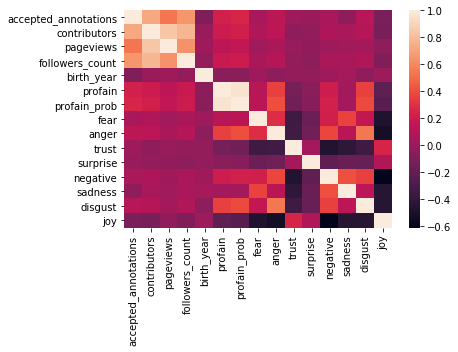

In [11]:
sns.heatmap(songs.corr());

## PCS Dimensionality Reduction

In [12]:
artist_indexed = by_artist.set_index('artist')

In [13]:
artist_indexed.head()

fear     anger     trust  surprise  negative  \
artist                                                                     
21 Savage               0.114610  0.123018  0.093503  0.058702  0.194060   
24kGoldn                0.096347  0.109339  0.069825  0.041482  0.178445   
A Boogie wit da Hoodie  0.100514  0.109914  0.068673  0.041239  0.176528   
AJR                     0.085848  0.069828  0.087860  0.074756  0.153095   
Ariana Grande           0.052359  0.065874  0.101335  0.049736  0.151638   

                         sadness   disgust       joy  
artist                                                
21 Savage               0.070610  0.074014  0.073955  
24kGoldn                0.098496  0.054829  0.098415  
A Boogie wit da Hoodie  0.087168  0.087480  0.094522  
AJR                     0.078417  0.070540  0.100233  
Ariana Grande           0.074231  0.049355  0.126644

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
artist_pca = pd.DataFrame(pca.fit_transform(artist_indexed))#.set_index('artist')
artist_pca['artist'] = by_artist['artist']
artist_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','artist']
artist_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.047363  0.027969  0.012258 -0.003547  0.025561 -0.010358  0.004930   
1 -0.020995 -0.005126 -0.009443  0.000032  0.000791 -0.002598  0.021706   
2 -0.033241  0.009322 -0.019120  0.000113 -0.001139 -0.005560 -0.005865   
3  0.019070  0.006471  0.001212  0.006581  0.019415  0.013746 -0.020803   
4  0.052561  0.015413 -0.001211  0.027976 -0.004747  0.001359  0.004667   

        PC8                  artist  
0 -0.010196               21 Savage  
1  0.001471                24kGoldn  
2 -0.001242  A Boogie wit da Hoodie  
3 -0.007616                     AJR  
4  0.000099           Ariana Grande

In [15]:
import plotly.express as px

fig = px.scatter(artist_pca, x='PC1', y='PC2', hover_data = ['artist'])
fig.show()

In [16]:
import plotly.express as px

fig = px.scatter_3d(artist_pca, x='PC1', y='PC2', z='PC3', hover_data = ['artist'])
fig.show()

## Spider Plots

Plot emotion by artist

In [17]:
def make_spider( title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,1,1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.tick_params(axis='x', which='major', pad=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.05,.10,.15,.20], ['.05','.10','.15','.20'], color="grey", size=10)
    plt.ylim(0,.24)

    # Ind1
    values=df.loc[row].drop('artist').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.tight_layout(pad=4.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.15)


#### Top 4 Artists: Fear

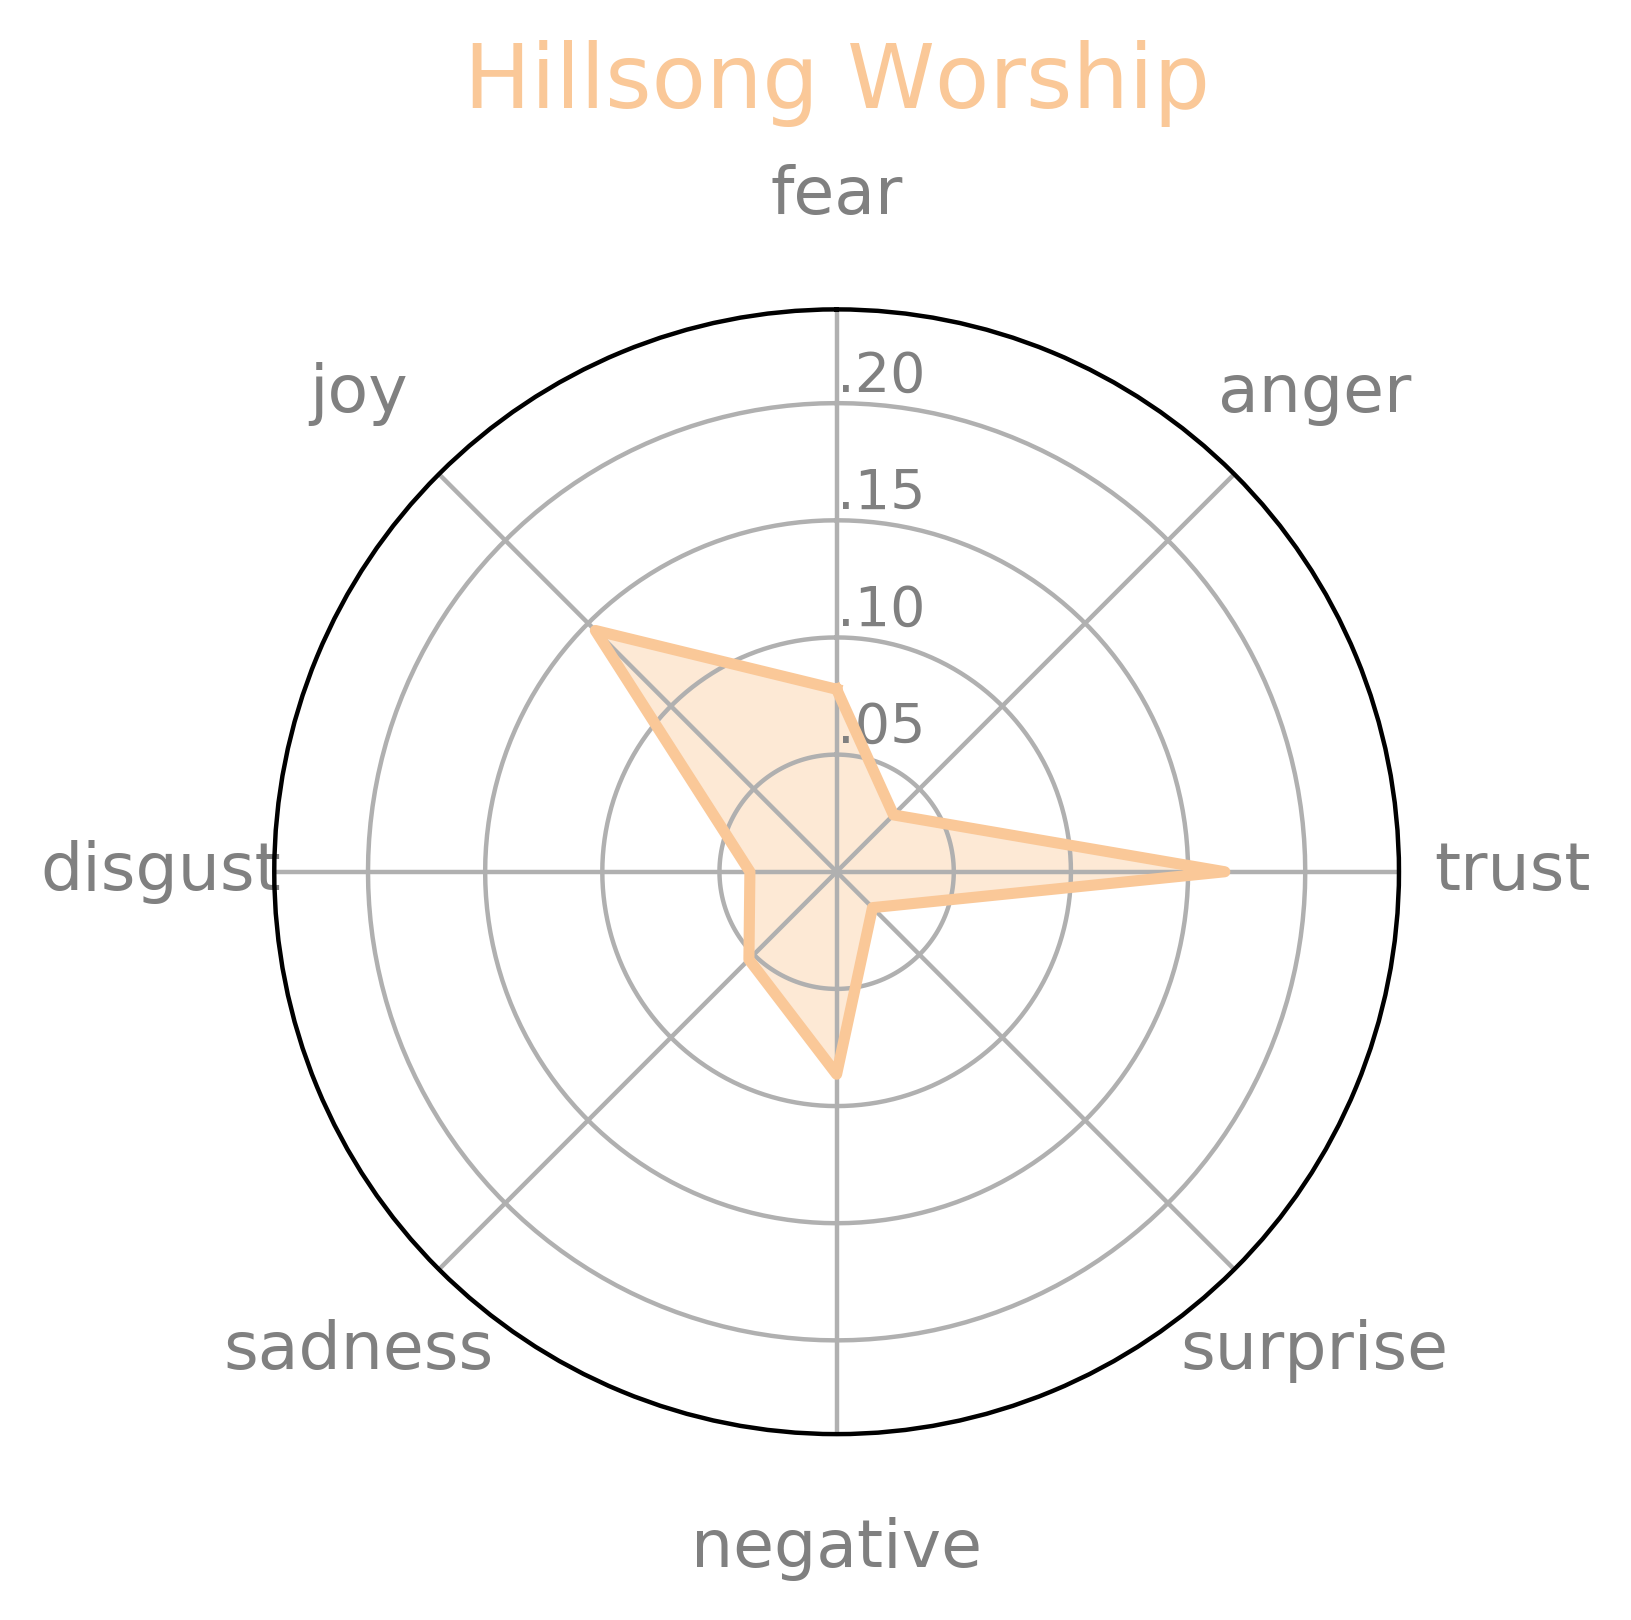

In [18]:
df = by_artist.sort_values(by = 'trust').tail(1).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( title=df['artist'][row], color='#FAC898')

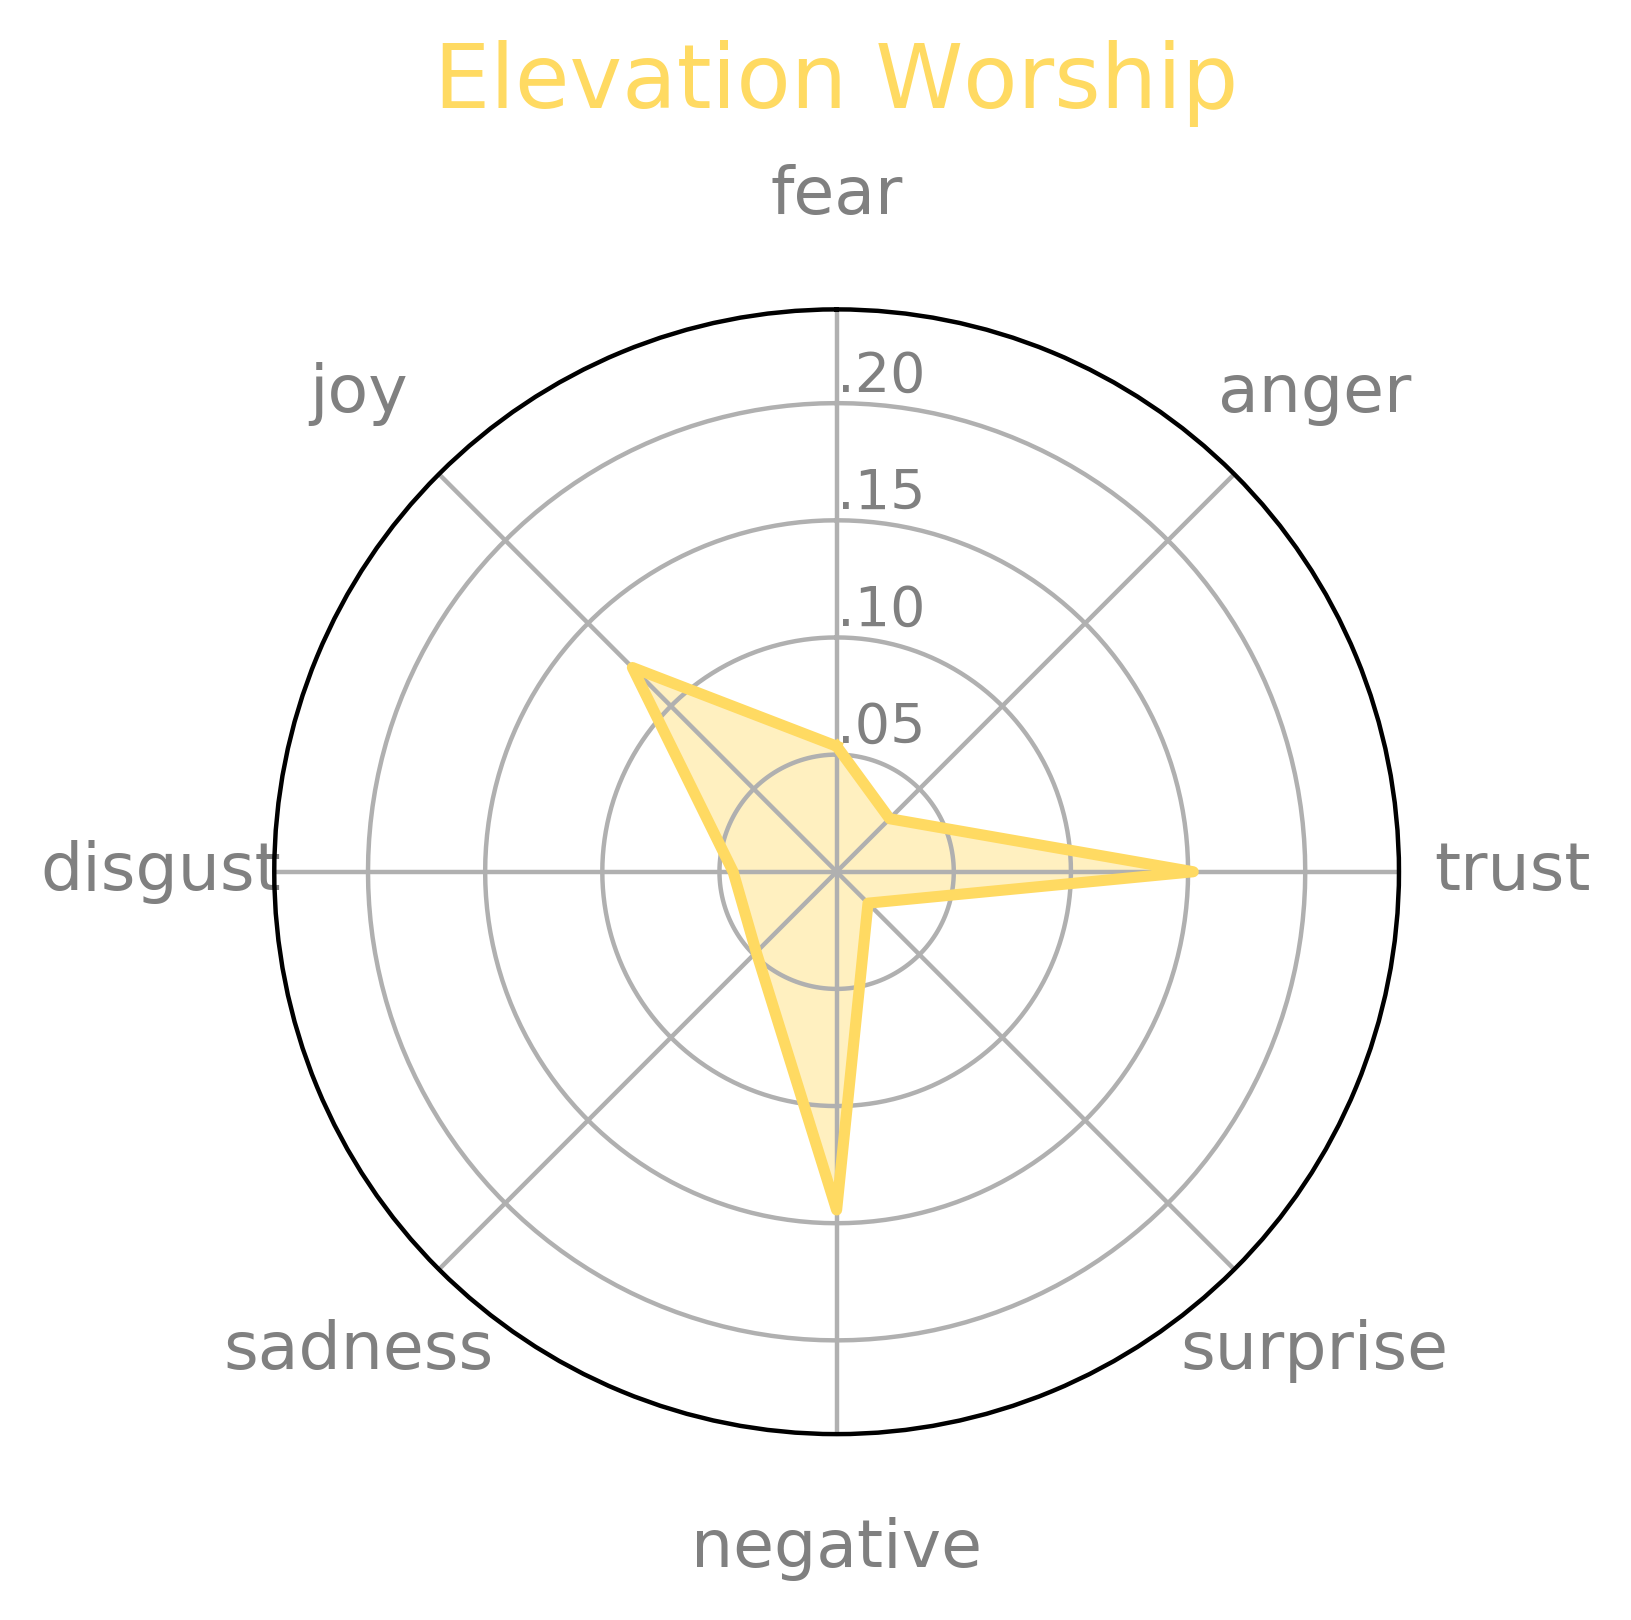

In [19]:
df = by_artist.sort_values(by = 'trust').tail(2).head(1).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( title=df['artist'][row], color='#ffda62')

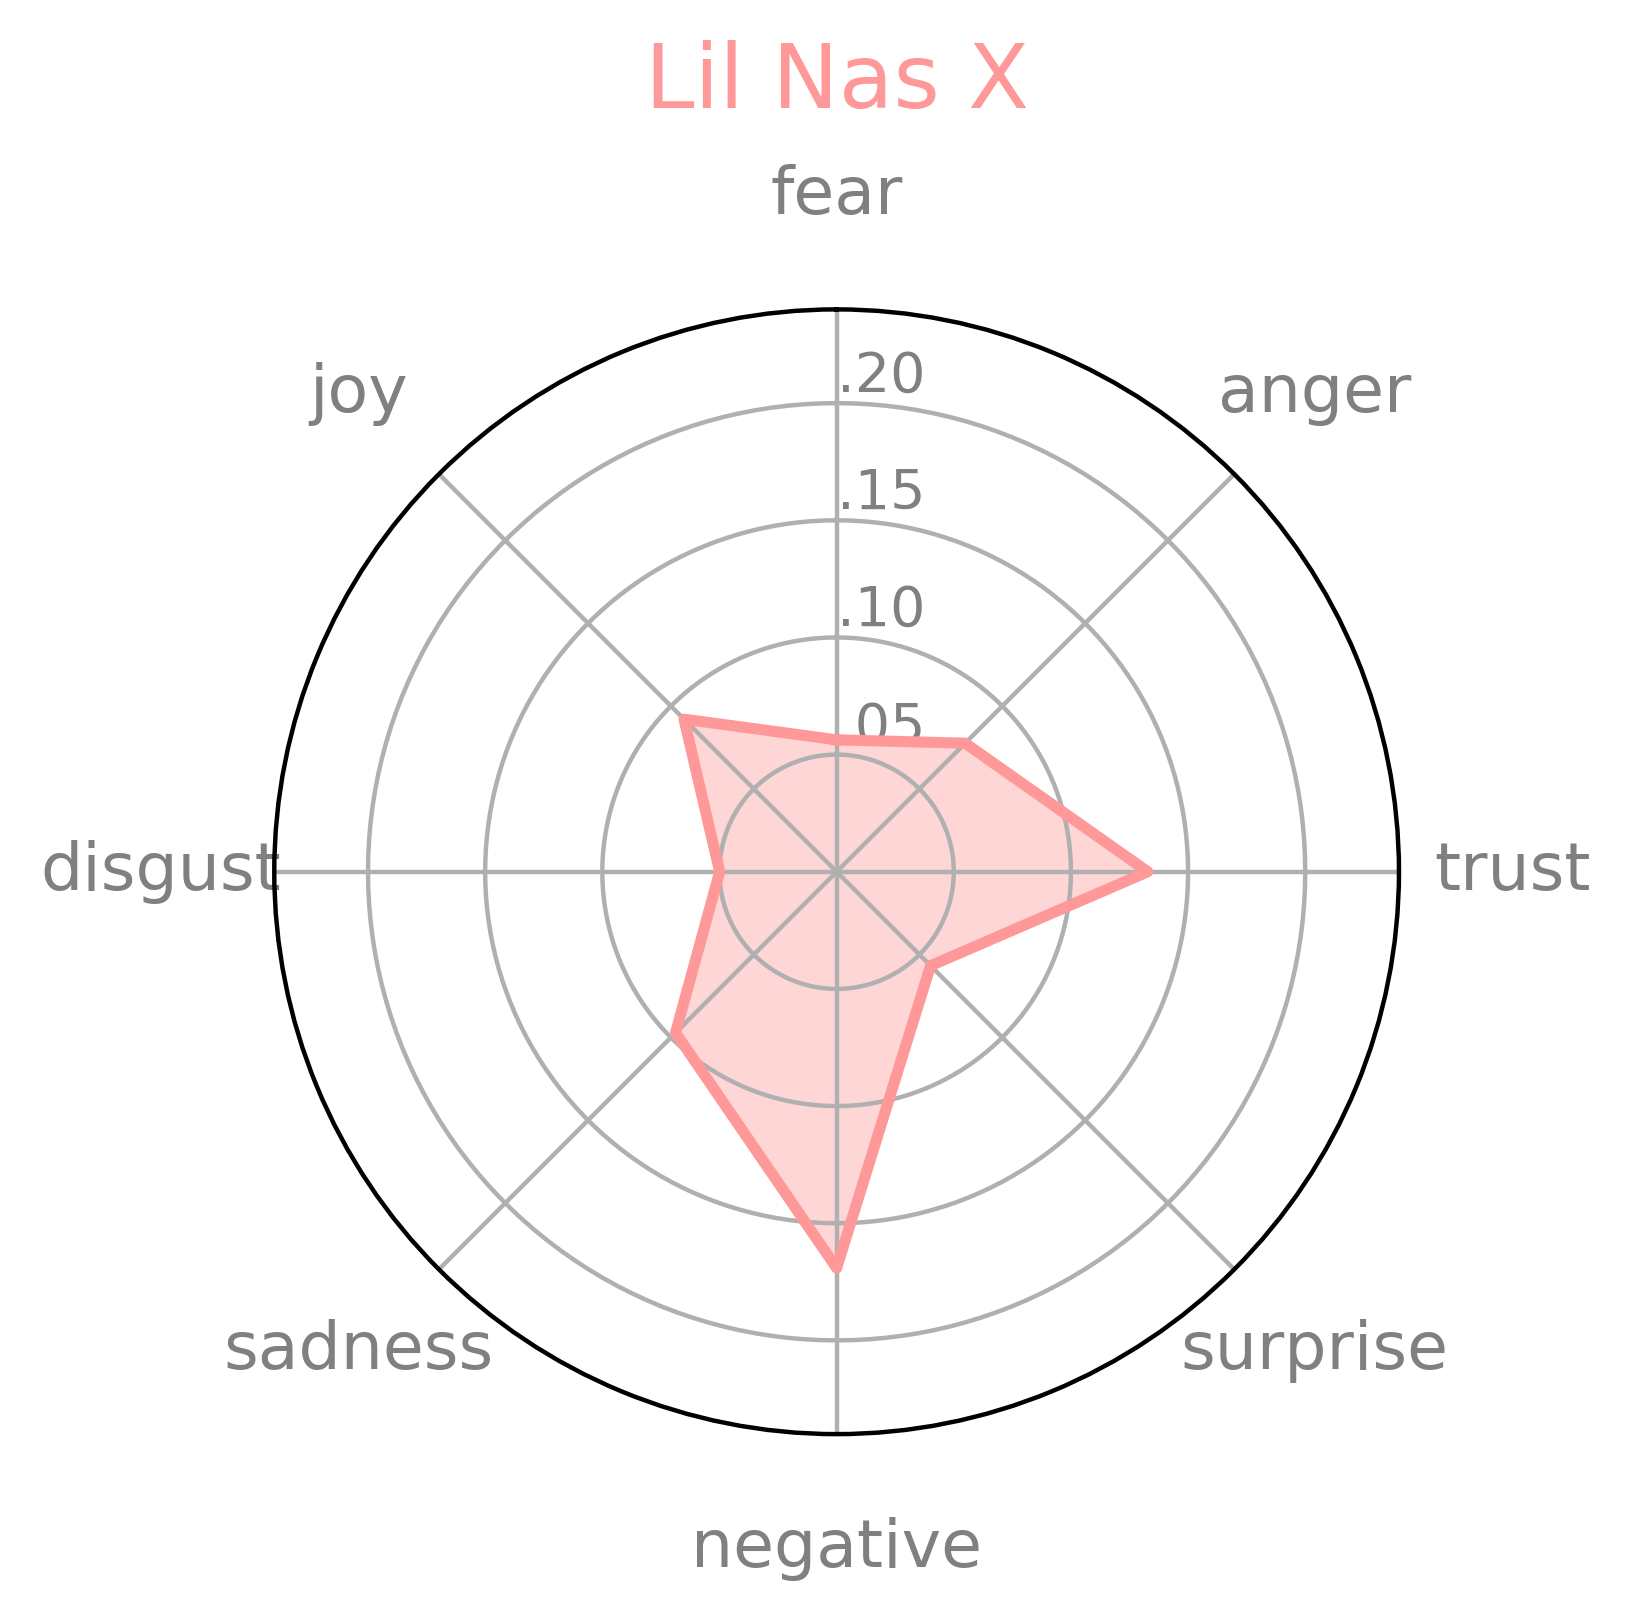

In [20]:
df = by_artist.sort_values(by = 'trust').tail(3).head(1).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( title=df['artist'][row], color='#ff9999')

In [21]:
by_artist.sort_values(by = 'trust').tail(3)

artist      fear     anger     trust  surprise  negative  \
67          Lil Nas X  0.056301  0.077594  0.132790  0.056691  0.169130   
28  Elevation Worship  0.053591  0.032001  0.152187  0.018956  0.144330   
40   Hillsong Worship  0.077875  0.034317  0.165672  0.021654  0.086415   

     sadness   disgust       joy  
67  0.097218  0.049902  0.092106  
28  0.048507  0.044170  0.123260  
40  0.052934  0.037005  0.145621

##### colors:
    purple = '#C7CEEA'
    green1 = '#B5EAD7'
    blue = '#92BEE8'
    orange = '#FFDAC1'
    melon = '#FFB7B2'
    pink = '#FF9AA2'

#### Top 4 Artists: Anger

In [22]:
df = by_artist.sort_values(by = 'anger').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

TypeError: make_spider() got an unexpected keyword argument 'row'

<Figure size 3500x3500 with 0 Axes>

#### Top 4 Artists: Trust

In [ ]:
df = by_artist.sort_values(by = 'trust').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

#### Top 4 Artists: Surprise

In [ ]:
df = by_artist.sort_values(by = 'surprise').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

#### Top 4 Artists: Negative

In [ ]:
df = by_artist.sort_values(by = 'negative').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

#### Top 4 Artists: Sadness

In [ ]:
df = by_artist.sort_values(by = 'sadness').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

#### Top 4 Artists: Disgust

In [ ]:
df = by_artist.sort_values(by = 'disgust').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

#### Top 4 Artists: Joy

In [ ]:
df = by_artist.sort_values(by = 'joy').tail(4).reset_index(drop=True)

# initialize the figure
my_dpi=400
plt.figure(figsize=(3500/my_dpi, 3500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['artist'][row], color=my_palette(row))

# Get Emotion by Gender

In [ ]:
by_gender = pd.DataFrame(songs.groupby('gender').mean()).reset_index()
by_gender = by_gender[['gender','fear', 'anger', 'trust', 'surprise', 'negative','sadness', 'disgust', 'joy']]

In [ ]:
by_gender

In [ ]:
songs.head()

# Get Emotion by Age

In [ ]:
by_decade = pd.DataFrame(songs.groupby('birth_decade').mean()).reset_index()
by_decade = by_decade[['birth_decade','fear', 'anger', 'trust', 'surprise', 'negative','sadness', 'disgust', 'joy']]
by_decade

In [ ]:
by_5_yr = pd.DataFrame(songs.groupby('birth_5_yr').mean()).reset_index()
by_5_yr = by_5_yr[['birth_5_yr','fear', 'anger', 'trust', 'surprise', 'negative','sadness', 'disgust', 'joy']]
by_5_yr = by_5_yr.sort_values(by = 'birth_5_yr')
by_5_yr

In [ ]:
import plotly.express as px
stacked = by_5_yr.set_index('birth_5_yr')
stacked = stacked.stack().reset_index()
fig = px.line(stacked, x="birth_5_yr", y=0, color='level_1')
fig.show()

In [ ]:
stacked = by_decade.set_index('birth_decade')
stacked = stacked.stack().reset_index()
fig = px.line(stacked, x="birth_decade", y=0, color='level_1')
fig.show()

# Negative/ Positive with VADER by Artist

In [9]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
def get_neg_sentiment(row):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    
    # sentiment dictionary
    sent_dict = sid_obj.polarity_scores(row['cleaned_lyrics'])
    
    return (sent_dict['neg']*100)

def get_pos_sentiment(row):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    
    # sentiment dictionary
    sent_dict = sid_obj.polarity_scores(row['cleaned_lyrics'])
    
    return (sent_dict['pos']*100)

In [11]:
songs['neg_score'] = songs.apply(get_neg_sentiment, axis = 1)
songs['pos_score']  = songs.apply(get_pos_sentiment, axis = 1)

In [12]:
songs.head()

song_name       artist  \
0       ​​rockstar  Post Malone   
1    White Iverson  Post Malone   
2  Congratulations  Post Malone   
3           Psycho  Post Malone   
4     I Fall Apart  Post Malone   

                                              lyrics  \
0  [Intro: Post Malone] Hahahahaha Tank God Ayy, ...   
1  [Intro] Double OT I'm a new three [Chorus] Sau...   
2  [Intro: Post Malone] Mm-mmm Yeah, yeah Mm-mmm ...   
3  [Chorus: Post Malone] Damn, my AP goin' psycho...   
4  [Intro] Ooh, I fall apart Ooh, yeah, mmm, yeah...   

                                     descriptionsong  accepted_annotations  \
0  On “rockstar,” Post Malone compares his habits...                  18.0   
1  Virtually unknown before this track, Post Malo...                  31.0   
2  On “Congratulations,“ Post Malone and Quavo ce...                  13.0   
3  “Psycho” is the third single from Post Malone’...                  21.0   
4  On “I Fall Apart,” Post reminisces about a hea...                   7.0   

   contributors  pageviews                                  descriptionartist  \
0         440.0  6884752.0  Austin Richard Post (born July 4, 1995), bette...   
1         222.0  4145011.0  Austin Richard Post (born July 4, 1995), bette...   
2         222.0  3634846.0  Austin Richard Post (born July 4, 1995), bette...   
3         230.0  3082328.0  Austin Richard Post (born July 4, 1995), bette...   
4         126.0  2640796.0  Austin Richard Post (born July 4, 1995), bette...   

                                          images_url  followers_count gender  \
0  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
1  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
2  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
3  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   
4  https://images.genius.com/1010194fa644be099aa2...           4616.0   Male   

   birth_year birth_decade birth_5_yr  \
0      1995.0        1990s  1995-1999   
1      1995.0        1990s  1995-1999   
2      1995.0        1990s  1995-1999   
3      1995.0        1990s  1995-1999   
4      1995.0        1990s  1995-1999   

                                      cleaned_lyrics  profain  profain_prob  \
0  [intro: post malone] hahahahaha tank god ayy a...        1      1.000000   
1  [intro] double ot im a new three [chorus] sauc...        1      1.000000   
2  [intro: post malone] mm_mmm mm_mmm yeah (hey) ...        1      0.998367   
3  [chorus: post malone] damn my ap going psycho ...        1      1.000000   
4  [intro] ooh i fall apart ooh yeah mmm yeah  [v...        0      0.202692   

       fear     anger     trust  surprise  negative   sadness   disgust  \
0  0.084615  0.153846  0.138462  0.030769  0.130769  0.046154  0.046154   
1  0.139665  0.106145  0.072626  0.078212  0.111732  0.089385  0.027933   
2  0.052632  0.096491  0.061404  0.078947  0.087719  0.026316  0.052632   
3  0.079646  0.150442  0.141593  0.017699  0.176991  0.079646  0.123894   
4  0.069767  0.093023  0.058140  0.058140  0.232558  0.139535  0.093023   

        joy  neg_score  pos_score  
0  0.115385        7.8       12.2  
1  0.083799       11.7       12.0  
2  0.140351       10.5       16.5  
3  0.070796       15.7       11.1  
4  0.034884       16.8        8.4

In [13]:
song_sent = songs.groupby('artist')['neg_score','pos_score','profain_prob','gender'].mean().reset_index()
song_sent = song_sent.merge(songs[['artist','gender']], how = 'left', on = 'artist')

In [14]:
song_sent.head()

artist  neg_score  pos_score  profain_prob gender
0  21 Savage      18.72  10.906667        0.9862   Male
1  21 Savage      18.72  10.906667        0.9862   Male
2  21 Savage      18.72  10.906667        0.9862   Male
3  21 Savage      18.72  10.906667        0.9862   Male
4  21 Savage      18.72  10.906667        0.9862   Male

In [16]:
import plotly.express as px

fig = px.scatter(song_sent, x='neg_score', y='pos_score', hover_data = ['artist'])

fig.update_traces(marker=dict(size=10, color = '#99e6ff',
                              line=dict(width=1,
                                        color='#6633ff')),
                  selector=dict(mode='markers'))
fig.update_layout(title_text='Artist Sentiment Positive Vs. Negative', title_x=0.5)

fig.show()

In [17]:
import chart_studio
username = 'savyrosea' # your username
api_key = 'f2MkYLkzjhEI2WWtnrEV' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
import chart_studio.plotly as py
py.plot(fig, filename = 'artist_sentiment', auto_open=True)

'https://plotly.com/~savyrosea/1/'

In [19]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

In [ ]:
def get_sent_num(row):
    if row['neg_score'] > row['pos_score']:
        return row['neg_score'] * -1
    else:
        return row['pos_score']

In [39]:
song_sent['score'] = song_sent.apply(get_sent_num, axis = 1)

In [40]:
song_sent.sort_values(by = 'score').head(5)

artist  neg_score  pos_score  profain_prob      score
82   Megan Thee Stallion  20.706667  12.240000      1.000000 -20.706667
125         XXXTENTACION  19.086667  13.120000      0.870015 -19.086667
126            YNW Melly  18.760000  13.546667      0.892134 -18.760000
0              21 Savage  18.720000  10.906667      0.986200 -18.720000
78     Machine Gun Kelly  18.580000  11.253333      0.865723 -18.580000

In [41]:
song_sent.sort_values(by = 'score').tail(5)

artist  neg_score  pos_score  profain_prob      score
111          Surfaces   4.880000  20.166667      0.056970  20.166667
13     Camila Cabello   8.346667  20.260000      0.447679  20.260000
72              Lizzo  11.526667  21.086667      0.889277  21.086667
4       Ariana Grande   7.606667  21.993333      0.549443  21.993333
40   Hillsong Worship   4.680000  26.086667      0.005372  26.086667

In [42]:
song_sent['diff'] = song_sent['pos_score'] -song_sent['neg_score']

In [43]:
song_sent.sort_values(by = 'diff').tail(5)

artist  neg_score  pos_score  profain_prob      score  \
62           Lee Brice   6.286667  18.713333      0.517787  18.713333   
4        Ariana Grande   7.606667  21.993333      0.549443  21.993333   
28   Elevation Worship   4.326667  19.146667      0.221766  19.146667   
111           Surfaces   4.880000  20.166667      0.056970  20.166667   
40    Hillsong Worship   4.680000  26.086667      0.005372  26.086667   

          diff  
62   12.426667  
4    14.386667  
28   14.820000  
111  15.286667  
40   21.406667

In [44]:
song_sent.sort_values(by = 'diff').head(5)

artist  neg_score  pos_score  profain_prob      score  \
82  Megan Thee Stallion  20.706667  12.240000      1.000000 -20.706667   
0             21 Savage  18.720000  10.906667      0.986200 -18.720000   
78    Machine Gun Kelly  18.580000  11.253333      0.865723 -18.580000   
85         Moneybagg Yo  17.233333  10.926667      1.000000 -17.233333   
65             Lil Durk  16.666667  10.406667      1.000000 -16.666667   

        diff  
82 -8.466667  
0  -7.813333  
78 -7.326667  
85 -6.306667  
65 -6.260000

In [45]:
song_sent['point'] = 1

In [46]:
fig = px.scatter(song_sent, x='diff', y='profain_prob', hover_data = ['artist'])
fig.show()